In [1]:
# IMPORTING LIBRARIES AND DATASET

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
ImagePath='Images'
img_size=180
batch=32
CHANNELS=3

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    ImagePath,
    seed=123,
    validation_split=0.2,
    subset='training',
    batch_size=batch,
    image_size=(img_size,img_size)
)

Found 4314 files belonging to 5 classes.
Using 3452 files for training.


In [5]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    ImagePath,
    seed=123,
    validation_split=0.2,
    subset='validation',
    batch_size=batch,
    image_size=(img_size,img_size)
)

Found 4314 files belonging to 5 classes.
Using 862 files for validation.


In [6]:
flower_names=train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [7]:
import matplotlib.pyplot as plt

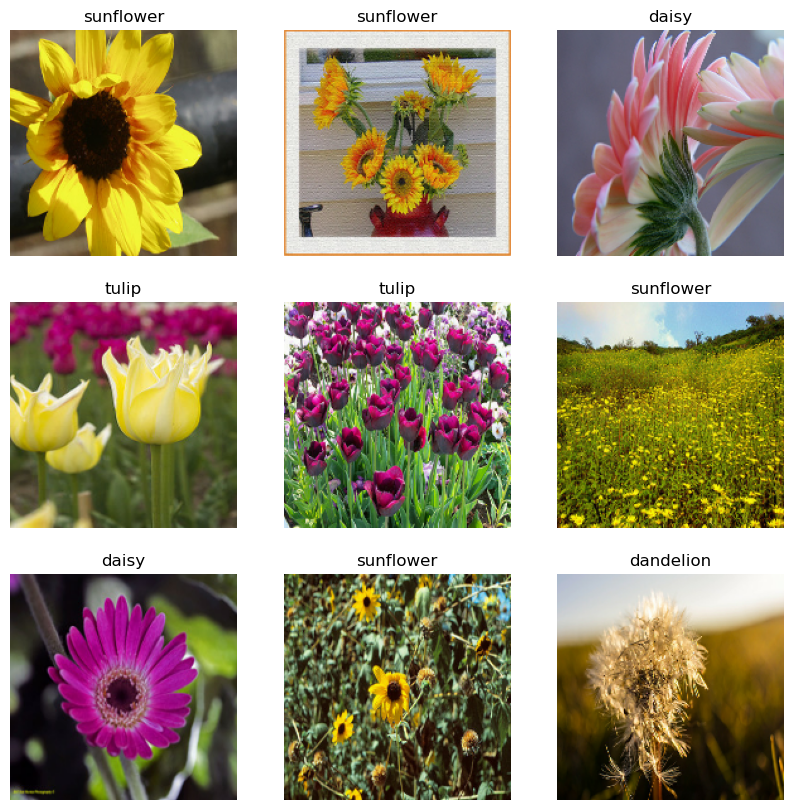

In [8]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(2):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis("off")

In [9]:
# DATA AUGUMENTATION

In [10]:
data_augumentation = Sequential([
    layers.RandomFlip("horizontal",input_shape=(img_size,img_size,CHANNELS)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

C:\Users\vaibh\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


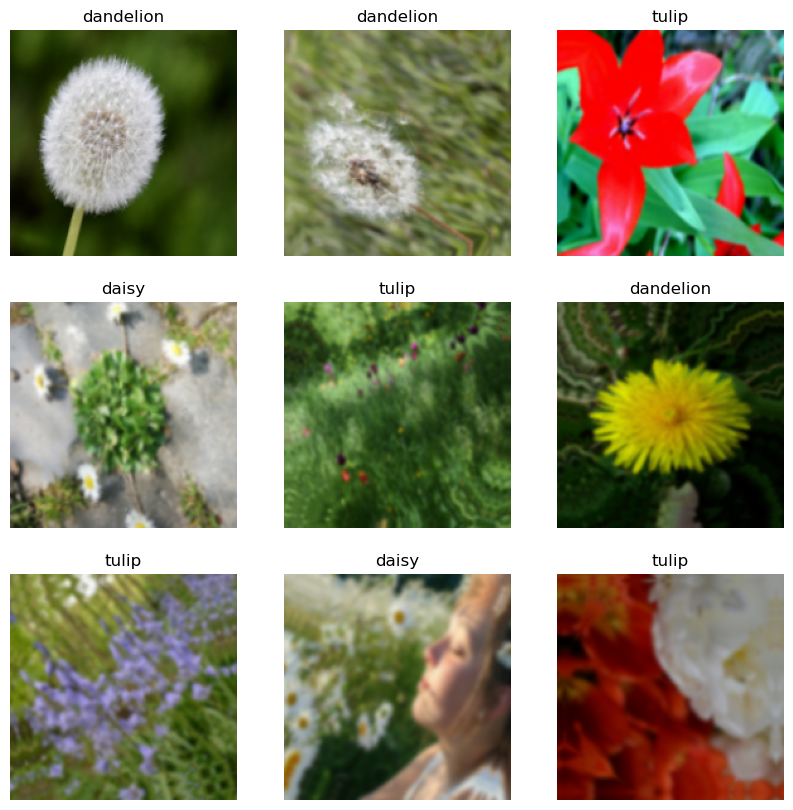

In [11]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(2):
    for i in range(9):
        images = data_augumentation(images)
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis("off")

In [12]:
# BUILDING MODEL

In [13]:
Classes=5
model= Sequential([
    data_augumentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),

    layers.Dense(128,activation='relu'),
    layers.Dense(Classes,activation='softmax')
])

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [15]:
model.build(input_shape = (batch, img_size, img_size, CHANNELS))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 180, 180, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (32, 180, 180, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 178, 178, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 89, 89, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 87, 87, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 43, 43, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 41, 41, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 20, 20, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (32, 20, 20, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 25600)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 128)                   │       3,276,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 5)                     │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,301,157 (12.59 MB)

 Trainable params: 3,301,157 (12.59 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history= model.fit(train_ds,epochs=20,validation_data=test_ds)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 163ms/step - accuracy: 0.3025 - loss: 1.5363 - val_accuracy: 0.5209 - val_loss: 1.1343
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 187ms/step - accuracy: 0.5684 - loss: 1.0960 - val_accuracy: 0.5684 - val_loss: 1.0694
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 192ms/step - accuracy: 0.6174 - loss: 0.9565 - val_accuracy: 0.6381 - val_loss: 0.9318
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 195ms/step - accuracy: 0.6361 - loss: 0.9048 - val_accuracy: 0.6636 - val_loss: 0.8881
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 195ms/step - accuracy: 0.6697 - loss: 0.8398 - val_accuracy: 0.6659 - val_loss: 0.8948
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 185ms/step - accuracy: 0.6944 - loss: 0.7989 - val_accuracy: 0.6775 - val_loss: 0.8829
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 185ms/step - accuracy: 0.6999 - loss: 0.7894 - val_accuracy: 0.6914 - val_loss: 0.8604
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 187ms/step - accuracy: 0.7244 - loss: 0

In [33]:
def classify_image(image_path):
    input_image=tf.keras.utils.load_img(image_path, target_size=(img_size, img_size))
    input_image_array=tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim=tf.expand_dims(input_image_array,0)

    predictions=model.predict(input_image_exp_dim)
    outcome='The Image belongs to {} with accuracy of {:0.2f}'.format(flower_names[np.argmax(predictions)],np.max(predictions)*100)
    
    return outcome

In [34]:
classify_image('Rose.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


'The Image belongs to rose with accuracy of 99.96'

In [35]:
classify_image('Sunflower.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


'The Image belongs to sunflower with accuracy of 98.01'

In [36]:
classify_image('Daisy.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


'The Image belongs to daisy with accuracy of 99.97'

In [37]:
classify_image('Tulip.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


'The Image belongs to tulip with accuracy of 99.27'

In [38]:
classify_image('Dandelion.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


'The Image belongs to dandelion with accuracy of 94.35'

In [39]:
model.save('Flower_Recog_Model.keras')